In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\uxoriousghost\\Python Machine Learning\\Datasets\\income.csv")

In [4]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

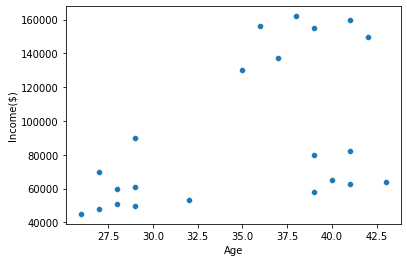

In [5]:
sns.scatterplot(x=df['Age'],y=df['Income($)'] )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [7]:
df.describe

<bound method NDFrame.describe of         Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000>

In [10]:
from sklearn.cluster import KMeans
KM_Model = KMeans(n_clusters = 3)
cluster_predict = KM_Model.fit_predict(df[['Age','Income($)']])
cluster_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [11]:
df['old_cluster'] = cluster_predict
df

,Name,Age,Income($),old_cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [13]:
# Create a seprate data frame with culster 0,1,2
df0 = df[df['old_cluster']==0]
df1 = df[df['old_cluster']==1]
df2 = df[df['old_cluster']==2]

In [14]:
df0

,Name,Age,Income($),old_cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


In [15]:
df1

,Name,Age,Income($),old_cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [16]:
df2

,Name,Age,Income($),old_cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

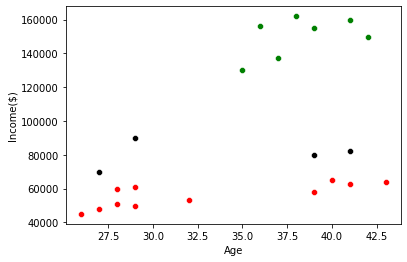

In [17]:
sns.scatterplot(x=df0['Age'],y=df0['Income($)'],color='red')
sns.scatterplot(x=df1['Age'],y=df1['Income($)'],color='green')
sns.scatterplot(x=df2['Age'],y=df2['Income($)'],color='black')

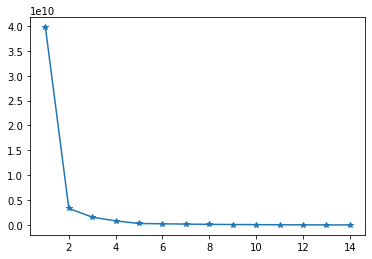

In [23]:
#Getting reliable K in K means clustering

SSE_without_Pre = []
for k in range(1,15):
    KM_Model_K = KMeans(n_clusters = k)
    KM_Model_K.fit_predict(df[['Age','Income($)']])
    SSE_without_Pre.append(KM_Model_K.inertia_)
    
    
# Elbow Plot to determine effective n_clusters

plt.plot(range(1,15),SSE_without_Pre,'*-')

# Due to some unknown issue my value of k is showing 2 
# but it is supposed to be 3
# After doing Min Max Scaling we get the correct value of k

In [24]:
# Transfer the vzalue in range of 0 to 1

from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

Scaler.fit(df[['Income($)']])
df['Income($)'] = Scaler.transform(df[['Income($)']])

Scaler.fit(df[['Age']])
df['Age'] = Scaler.transform(df[['Age']])

In [25]:
df

,Name,Age,Income($),old_cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [26]:
from sklearn.cluster import KMeans

KM_Model_3 = KMeans(n_clusters=3)

cluster_predict_new = KM_Model_3.fit_predict(df[['Age','Income($)']])

In [27]:
df['new_cluster'] = cluster_predict_new

In [28]:
df

,Name,Age,Income($),old_cluster,new_cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,2
5,Gautam,0.764706,0.940171,1,2
6,David,0.882353,0.982906,1,2
7,Andrea,0.705882,1.000000,1,2
8,Brad,0.588235,0.948718,1,2
9,Angelina,0.529412,0.726496,1,2


In [29]:
# Create a seprate data frame with culster 0,1,2
df0_new = df[df['new_cluster']==0]
df1_new = df[df['new_cluster']==1]
df2_new = df[df['new_cluster']==2]

In [31]:
df0_new

,Name,Age,Income($),old_cluster,new_cluster
16,Dipika,0.823529,0.170940,0,0
17,Priyanka,0.882353,0.153846,0,0
18,Nick,1.000000,0.162393,0,0
19,Alia,0.764706,0.299145,2,0
20,Sid,0.882353,0.316239,2,0
21,Abdul,0.764706,0.111111,0,0


In [32]:
df1_new

,Name,Age,Income($),old_cluster,new_cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
11,Tom,0.000000,0.000000,0,1
12,Arnold,0.058824,0.025641,0,1
13,Jared,0.117647,0.051282,0,1
14,Stark,0.176471,0.038462,0,1
15,Ranbir,0.352941,0.068376,0,1


In [33]:
df2_new

,Name,Age,Income($),old_cluster,new_cluster
4,Kory,0.941176,0.897436,1,2
5,Gautam,0.764706,0.940171,1,2
6,David,0.882353,0.982906,1,2
7,Andrea,0.705882,1.000000,1,2
8,Brad,0.588235,0.948718,1,2
9,Angelina,0.529412,0.726496,1,2
10,Donald,0.647059,0.786325,1,2


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

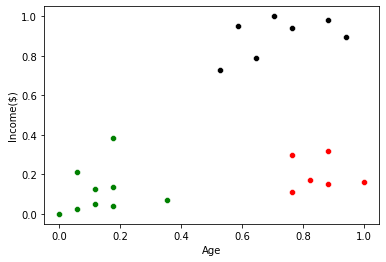

In [34]:
sns.scatterplot(x=df0_new['Age'],y=df0_new['Income($)'],color='red')
sns.scatterplot(x=df1_new['Age'],y=df1_new['Income($)'],color='green')
sns.scatterplot(x=df2_new['Age'],y=df2_new['Income($)'],color='black')

In [35]:
KM_Model_3.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

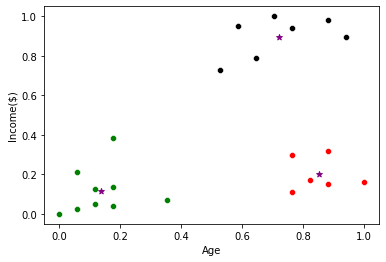

In [36]:
sns.scatterplot(x=df0_new['Age'],y=df0_new['Income($)'],color='red')
sns.scatterplot(x=df1_new['Age'],y=df1_new['Income($)'],color='green')
sns.scatterplot(x=df2_new['Age'],y=df2_new['Income($)'],color='black')
plt.scatter(KM_Model_3.cluster_centers_[:,0],KM_Model_3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [37]:
SSE = []

for k in range(1,15):
    KM_Model_K = KMeans(n_clusters=k)
    KM_Model_K.fit_predict(df[['Age','Income($)']])
    
    SSE.append(KM_Model_K.inertia_)
    

In [38]:
SSE

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2621792762345213,
 0.21066678488010523,
 0.17299621932455464,
 0.13265419827245162,
 0.11073569527418643,
 0.08716596488496353,
 0.061533596714222503,
 0.04681168434939174,
 0.03974516641427297,
 0.030426552928992826]

Text(0, 0.5, 'SSE')

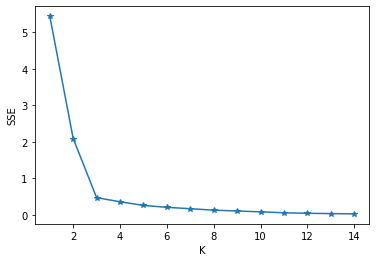

In [39]:
#Elbow plot

plt.plot(range(1,15),SSE,'*-')
plt.xlabel("K")
plt.ylabel("SSE")